In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
def f_right (u, a = 0.05):
    return u*(a-u)*(u-1)

def accurate_w(grid, a = 0.05):
    w = 1/(1 + np.exp(-1/2*np.sqrt(2)*grid[0]+ 1/2 * (2*a-1)*grid[1]))
    return w

def result(N,M,f,L=1,T=1):

    x = np.linspace(0,L,N, endpoint=True)
    t = np.linspace(0,T,M, endpoint=True)

    grid = np.meshgrid(x, t)
    true_result = np.array(f(grid))

    return true_result

def f_test(grid):
    w = grid[0]**2
    return w

def f_0(grid):
    return 0

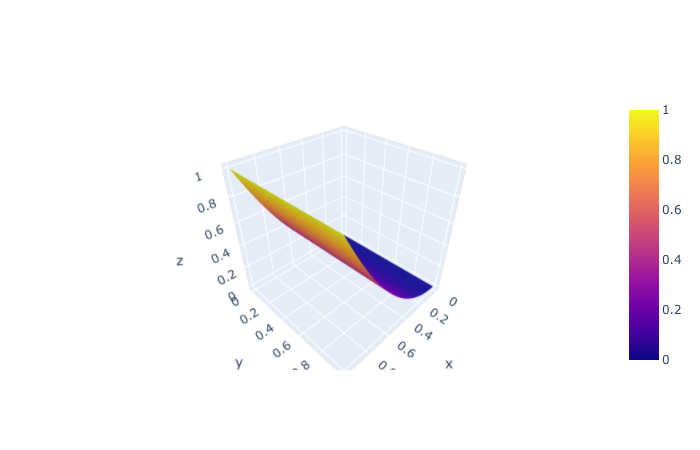

In [4]:
N,M = (100,100) 
fig = go.Figure(go.Surface(z = result(N,M,f_test), x = np.linspace(0,1,N), y = np.linspace(0,1,M)))
fig.show("png")

In [7]:
def explicit_y_up (i,j,data, f): #явная схема для одгого шага
    
    y_centaral = data[j][i]
    y_left = data[j][i-1]
    y_right = data[j][i+1]
    
    y_up = y_centaral + tau/(h**2) * (y_right - 2 * y_centaral + y_left) + tau * f(y_centaral)

    return y_up

def create_data (N,M,f): #создание сетки с начальными условиями
    data = np.zeros([M,N])
    
    for i in range (N):
        data[0][i] = f([i*h,0])

    for i in range (M):
        data[i][0] = f([0,i*tau])
        data[i][N-1] = f([N*h,i*tau])

    return data

def explicit_data(N,M,f_accur,f_right,L=1,T=1): #явная схема для всех шагов
    
    global h,tau
    h = L/N
    tau = T/M
    
    data = create_data(N,M,f_accur)
    for j in range(M-1):
        for i in range(1,N-1):
             data[j+1,i] = explicit_y_up(i,j,data,f_right)
    return data

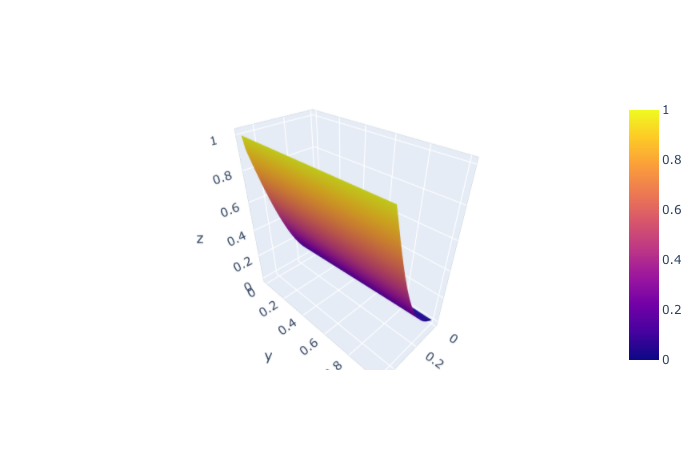

In [8]:

fig = go.Figure(go.Surface(z = explicit_data(50,5000,f_test,f_0), x = np.linspace(0,1,N), y = np.linspace(0,1,M)))
fig.show("png")

In [43]:
h_test = 0.1/2
 
N_mass_explicit = []
M_mass_explicit = []
h_mass = []
for i in range (3):
    
    h_new = h_test/(2**i)
    h_mass.append(h_new)
    tau_new = h_new**2/4 # тау = h^2/4
    
    N_new = 1/h_new
    M_new = 1/tau_new

    N_mass_explicit.append(int(N_new))
    M_mass_explicit.append(int(M_new))


result_explicit = np.array([explicit_data(N_mass_explicit[i],M_mass_explicit[i],accurate_w,f_right) for i in range(3)])
result_accurate= np.array([result(N_mass_explicit[i],M_mass_explicit[i],accurate_w) for i in range(3)]) # посчитали точное решение и явной схемы на 3 разынх сетках 

delta = np.abs(result_accurate-result_explicit) 

delta_max = [np.max(delta[i]) for i in range(3)] # находим максимальное отколенние для кадой сетки




In [66]:
for i in range(len(delta)):
    print("h_",i, "=",h_mass[i],"delta =",delta[i][-1][N_mass_explicit[i]//2])


h_ 0 = 0.05 delta = 0.0005303434703712862
h_ 1 = 0.025 delta = 0.0002531819850412065
h_ 2 = 0.0125 delta = 0.0001235074910214129


In [67]:
np.log(delta_max[1]/delta_max[2])/np.log(2) # p 

0.987304929080268